In [1]:
import settings
from Fit_HuberBraun_Matrix_5param_AVB_First import Fit_HuberBraun_Matrix_5param_AVB_First
from Fit_HuberBraun_Matrix_5param_AVA_Second import Fit_HuberBraun_Matrix_5param_AVA_Second

In [2]:
settings.init()

In [3]:
paramsAVB = [[44, 0.000363000000000000, 5.45726102941647e-06, 0.00167208415554239, 0.000660000000000000],
           [68, 0.000966628944244780, 8.33918539323647e-06, 0.00208400000000000, 0.00316478079207975],
           [81, 0.000757091833987073, 5.79833984374115e-06, 0.000936577073528412, 0.000512000000000000], 
           [94, 0.000892000000000000, 6.13378099174940e-06, 0.00201196569493983, 0.00502294791546334],
           [98, 0.000889000000000000, 1.11084610156032e-05, 0.00165239584154480, 0.000512000000000000],
           [106, 0.00100200000000000, 1.82358292522831e-05, 0.000903535078875878, 0.000512000000000000],
           [112, 0.00111725138757093, 1.16292177635975e-05, 0.00176500000000000, 0.00191920134428983]]
paramsAVA = [[44, 0.00138300000000000, 5.45726102941647e-06, 0.00167208415554239, 0.000660000000000000],
             [68, 0.000715663214366652, 8.33918539323647e-06, 0.00208400000000000, 0.00316478079207975],
             [81, 0.00149599294308000, 5.79833984374115e-06, 0.000936577073528412, 0.000512000000000000],
             [94, 0.000537000000000000, 6.13378099174940e-06, 0.00201196569493983, 0.00502294791546334], 
             [98, 0.00104700000000000, 1.11084610156032e-05, 0.00165239584154480, 0.000512000000000000], 
             [106, 0.000675000000000000, 1.82358292522831e-05, 0.000903535078875878, 0.000512000000000000], 
             [112, 0.00126612633536624, 1.16292177635975e-05, 0.00176500000000000, 0.00191920134428983]]
curr_param = 6
r1 = paramsAVB[curr_param][0]
ubestAVB = paramsAVB[curr_param][1:]
t, y = Fit_HuberBraun_Matrix_5param_AVB_First(ubestAVB, r1, test=True)
V = y[0:settings.numCells, :]
asd = y[settings.numCells:2*settings.numCells, :]
asr = y[2*settings.numCells:3*settings.numCells, :]
s = y[3*settings.numCells:4*settings.numCells, :]
ubestAVA = paramsAVA[curr_param][1:]
t, y = Fit_HuberBraun_Matrix_5param_AVA_Second(ubestAVA, r1, V[:, -1], asd[:, -1], asr[:, -1], s[:, -1], test=True)
V = y[0:settings.numCells, :]
asd = y[settings.numCells:2*settings.numCells, :]
asr = y[2*settings.numCells:3*settings.numCells, :]
s = y[3*settings.numCells:4*settings.numCells, :]

dorsalmuscles = [11, 12, 13]
ventralmuscles = [14, 15, 16]
dorsal_inds = []
ventral_inds = []
for i in range(6):
    for j in range(len(dorsalmuscles)):
        dorsal_inds.append(dorsalmuscles[j] + i*17)
    for j in range(len(ventralmuscles)):
        ventral_inds.append(ventralmuscles[j] + i*17)

dorsal_muscle_V = V[dorsal_inds, :]
ventral_muscle_V = V[ventral_inds, :]

In [4]:
print(len(t))

600


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(dorsal_muscle_V[:, -1] - ventral_muscle_V[:, -1])

[20.07728663 31.20409537 37.00660933  5.8364098  18.8218977  30.63657198
 10.0423872  22.07304144 35.38731283 20.0483292  31.21746531 37.04249947
 10.11708388 23.3144778  34.07329206 11.32625871 24.81382917 20.5969075 ]


In [7]:
print(dorsal_muscle_V[:, 200] - ventral_muscle_V[:, 200])

[22.06059024 32.72895326 37.89667507  7.78754905 20.6657051  32.44328905
 12.6458531  24.75092727 35.11742355 13.88429627 26.19605138 33.89881716
  4.56878868 18.22330008 31.29889311  8.44395766 21.77570395 18.43568833]


In [8]:
d_minus_v = dorsal_muscle_V - ventral_muscle_V

In [9]:
max_vals = np.array([])
min_vals = np.array([])
for i in range(len(d_minus_v)):
    max_vals = np.append(max_vals, np.max(d_minus_v[i, 200:]))
    min_vals = np.append(min_vals, np.min(d_minus_v[i, 200:]))

print(max_vals)
print(min_vals)

[22.80922091 33.44458863 40.25343867 18.94734117 30.23743051 37.48595097
 23.04030771 33.65168674 39.04418065 24.10789384 34.46788119 38.96484428
 22.26504894 32.97977012 38.7786895  20.65930378 32.40876842 25.02302052]
[1.80921876e+01 2.93153551e+01 3.62979183e+01 1.90807485e+00
 1.49411309e+01 2.81474089e+01 6.67885841e-02 1.25843381e+01
 2.69940496e+01 3.38467912e-02 1.21376845e+01 2.75671672e+01
 1.58879284e+00 1.39177297e+01 2.91635844e+01 7.57007806e+00
 2.10688939e+01 1.79006298e+01]


In [10]:
total_sin_vals = np.array([])
for i in range(len(d_minus_v)):
    sin_vals = np.array([])
    for j in range(10):
        sin_vals = np.append(sin_vals, np.array(d_minus_v[i][:]*(np.sin((j)*np.pi/10))))
    sin_vals = sin_vals.reshape(10, 600)
    if i == 0:
        total_sin_vals = np.append(total_sin_vals, sin_vals[0:5])
        prev = sin_vals.copy()
        total_sin_vals = total_sin_vals.reshape(5, 600)
        continue
    total_sin_vals = np.append(total_sin_vals, sin_vals[0:5] + prev[5:10])
    prev = sin_vals.copy()
    total_sin_vals = total_sin_vals.reshape(5*(i+1), 600)
    if i == 17:
        total_sin_vals = np.append(total_sin_vals, sin_vals[5:10])
        total_sin_vals = total_sin_vals.reshape(5*(i+1)+5, 600)
print(total_sin_vals.shape)

(95, 600)


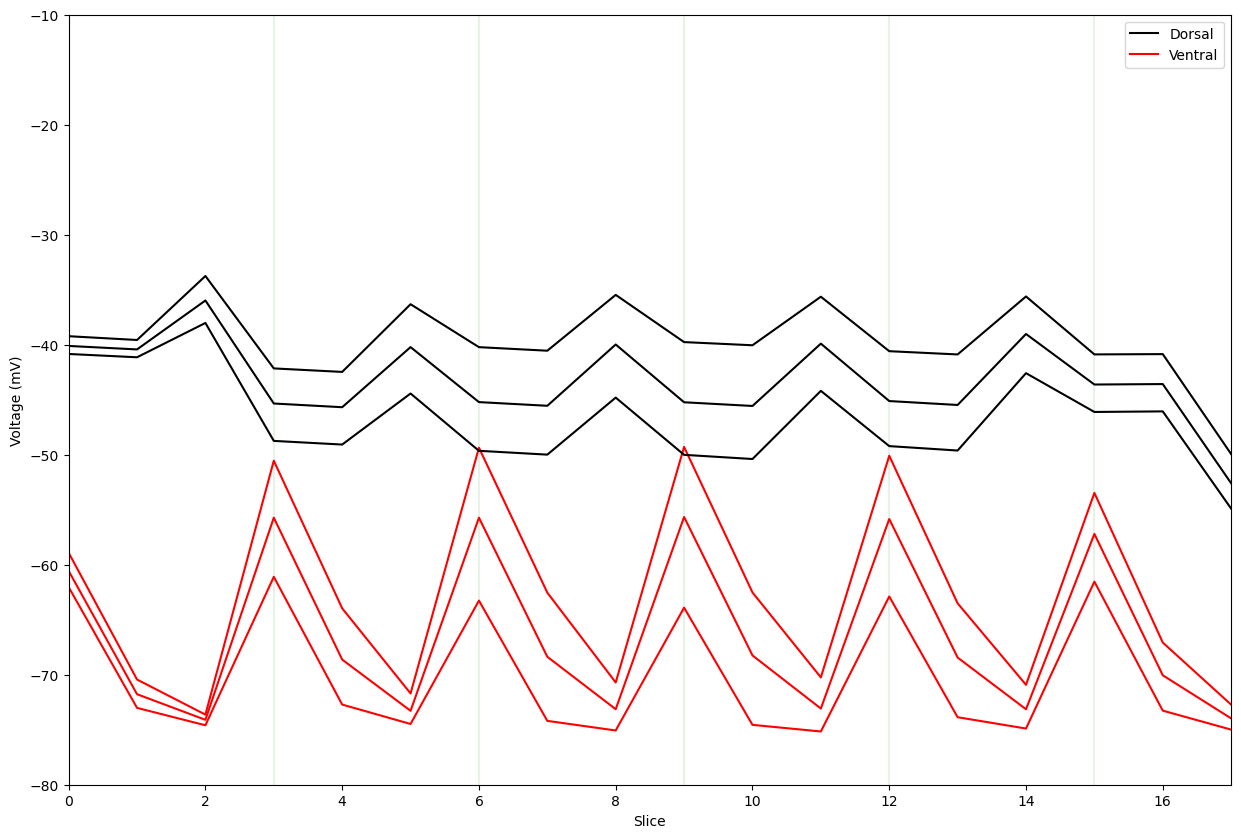

In [11]:
dorsal_max = np.max(dorsal_muscle_V[:, 200:], axis=1)
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)   
dorsal_avg = np.mean(dorsal_muscle_V[:, 200:], axis=1)
ventral_max = np.max(ventral_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)
ventral_avg = np.mean(ventral_muscle_V[:, 200:], axis=1)


plt.figure(figsize=(15, 10))
plt.vlines(range(0, 17, 3), ymin=-100, ymax=0, color="green", alpha=0.1)
plt.plot(dorsal_max, color="Black", label="Dorsal")
plt.plot(ventral_max, color="Red", label="Ventral")
plt.plot(dorsal_min, color="Black")
plt.plot(ventral_min, color="Red")
plt.plot(dorsal_avg, color="Black")
plt.plot(ventral_avg, color="Red")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 17)
plt.ylim(-80, -10)
plt.legend()

In [12]:
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)

In [13]:
dorsal_diff = np.array(dorsal_muscle_V[:, 200] - dorsal_min).reshape(18, 1)
ventral_diff = np.array(ventral_muscle_V[:, 200] - ventral_min).reshape(18, 1)

for i in range(399):
    dorsal_diff = np.append(dorsal_diff, np.subtract(dorsal_muscle_V[:, 200+i+1], dorsal_min).reshape(18, 1), axis=1)
    ventral_diff = np.append(ventral_diff, np.subtract(ventral_muscle_V[:, 200+i+1], ventral_min).reshape(18, 1), axis=1)

print(dorsal_diff.shape)
print(ventral_diff.shape)

(18, 400)
(18, 400)


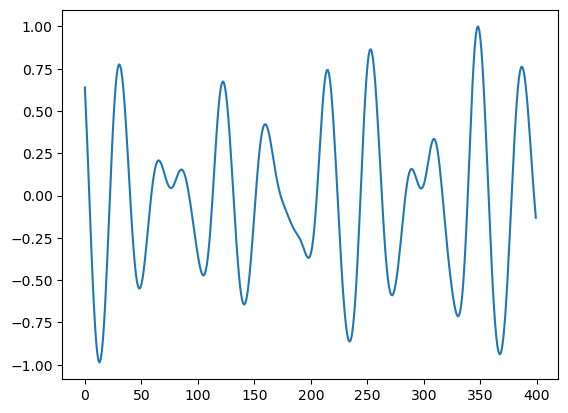

In [14]:
dorsal_strength = (dorsal_diff / (np.ones([18, 400]) * np.max(dorsal_diff, axis=1).reshape(18, 1))).reshape(18, 400)
ventral_strength = (ventral_diff / (np.ones([18, 400]) * np.max(ventral_diff, axis=1).reshape(18, 1))).reshape(18, 400)
plt.plot(dorsal_strength[0, :] - ventral_strength[0, :])
plt.show()

In [15]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal = np.array([])
final_ventral = np.array([])
for i in range(400):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength[j, i] * relative_strengths
        curr_ventral = ventral_strength[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal = next_step_dorsal
        final_ventral = next_step_ventral
    else:
        final_dorsal = np.append(final_dorsal, next_step_dorsal, axis=1)
        final_ventral = np.append(final_ventral, next_step_ventral, axis=1)

print(final_dorsal.shape)
print(final_ventral.shape)

(95, 400)
(95, 400)


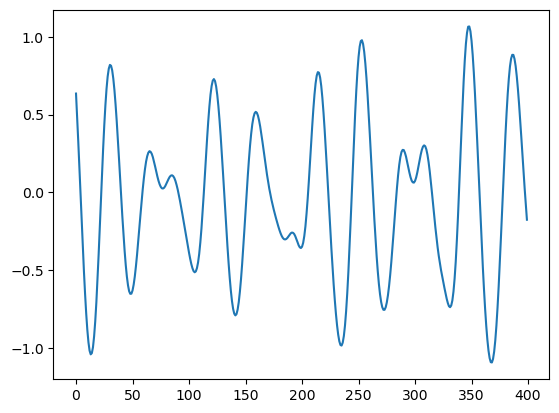

In [16]:
plt.plot(final_dorsal[10, :] - final_ventral[10, :])
plt.show()

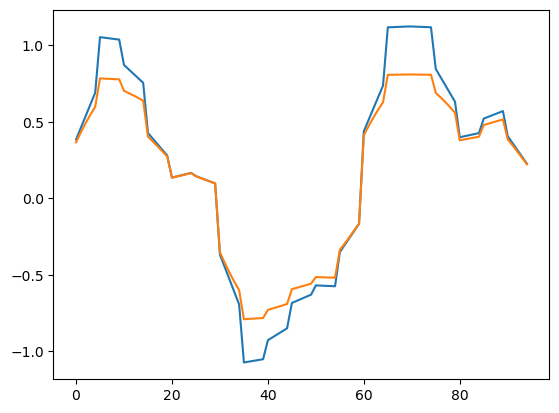

In [17]:
spot = 250
plt.plot(final_dorsal[:, spot] - final_ventral[:, spot])
plt.plot(np.tanh(final_dorsal[:, spot] - final_ventral[:, spot]))

In [18]:
out = np.array(np.tanh(final_dorsal - final_ventral))

In [19]:
np.savetxt(f'Data/AVA_neuro_muscle_{paramsAVA[curr_param][0]}.csv', final_dorsal, delimiter=',')

In [20]:
dorsal_avg = np.mean(dorsal_muscle_V, axis=1)
ventral_avg = np.mean(ventral_muscle_V, axis=1)

dorsal_diff_from_avg = np.array(dorsal_muscle_V[:, 400] - dorsal_avg).reshape(18, 1)
ventral_diff_from_avg = np.array(ventral_muscle_V[:, 400] - ventral_avg).reshape(18, 1)

for i in range(399):
    dorsal_diff_from_avg = np.append(dorsal_diff_from_avg, np.subtract(dorsal_muscle_V[:, 200+i+1], dorsal_avg).reshape(18, 1), axis=1)
    ventral_diff_from_avg = np.append(ventral_diff_from_avg, np.subtract(ventral_muscle_V[:, 200+i+1], ventral_avg).reshape(18, 1), axis=1)

print(dorsal_diff_from_avg.shape)
print(ventral_diff_from_avg.shape)
print(np.max(dorsal_diff_from_avg, axis=1))
print(np.max(ventral_diff_from_avg, axis=1))

(18, 400)
(18, 400)
[0.87798506 0.84782682 2.25681663 3.30321733 3.32156293 3.83382389
 4.94603538 4.95481219 4.38741085 5.39827269 5.4427319  4.17619513
 4.48260023 4.54098758 3.4307525  2.77487372 2.7595501  2.67856522]
[1.54422506 1.23446487 0.47326213 4.76134251 4.17572769 1.4789395
 6.3216354  5.8229744  2.48221546 6.35234604 5.6733661  2.84972185
 5.66043385 4.82186084 2.21951524 3.52843567 2.80308334 1.23441707]


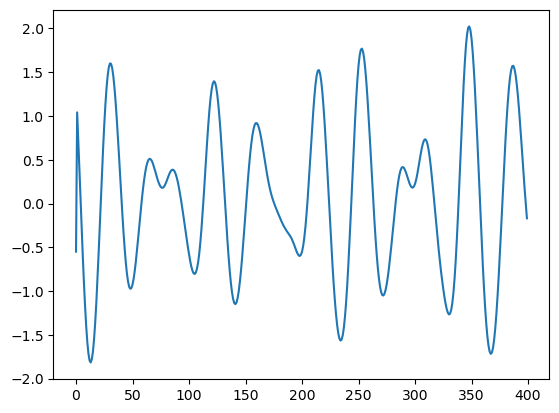

In [21]:
dorsal_strength_avg = (dorsal_diff_from_avg / (np.ones([18, 400]) * np.max(dorsal_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 400)
ventral_strength_avg = (ventral_diff_from_avg / (np.ones([18, 400]) * np.max(ventral_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 400)
plt.plot(dorsal_strength_avg[0, :] - ventral_strength_avg[0, :])
plt.show()


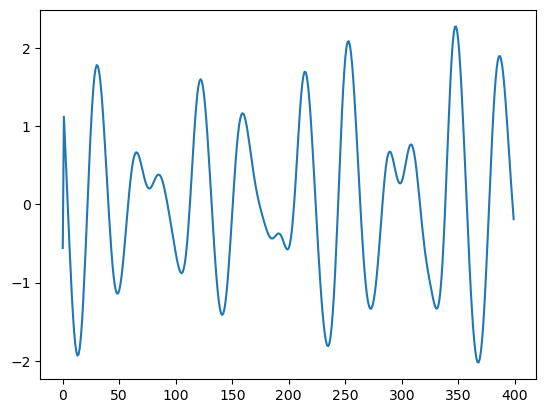

In [22]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal_avg = np.array([])
final_ventral_avg = np.array([])
for i in range(400):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength_avg[j, i] * relative_strengths
        curr_ventral = ventral_strength_avg[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal_avg = next_step_dorsal
        final_ventral_avg = next_step_ventral
    else:
        final_dorsal_avg = np.append(final_dorsal_avg, next_step_dorsal, axis=1)
        final_ventral_avg = np.append(final_ventral_avg, next_step_ventral, axis=1)

plt.plot(final_dorsal_avg[10, :] - final_ventral_avg[10, :])

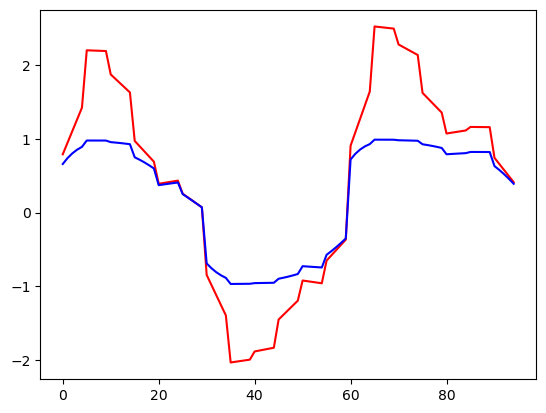

In [23]:
spot = 250
plt.plot(final_dorsal_avg[:, spot] - final_ventral_avg[:, spot], color="red")
plt.plot(np.tanh(final_dorsal_avg[:, spot] - final_ventral_avg[:, spot]), color="blue")
plt.show()

In [24]:
out = np.array(np.tanh(final_dorsal_avg - final_ventral_avg))
np.savetxt(f'Data/AVA_neuro_muscle_avg_{paramsAVB[curr_param][0]}.csv', out, delimiter=',')

In [25]:
'''
plt.figure(figsize=(15, 10))
plt.plot(total_sin_vals[:,325], color="Black")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.xlim(-0.25, 95)
plt.ylim(-65, 65)
plt.legend()
'''

'\nplt.figure(figsize=(15, 10))\nplt.plot(total_sin_vals[:,325], color="Black")\nplt.xlabel("Slice")\nplt.ylabel("Voltage (mV)")\nplt.xlim(-0.25, 95)\nplt.ylim(-65, 65)\nplt.legend()\n'

## The different voltages achieved by each segment
### Muscle 3 of each segment does not appear to reach the same negative values as the others

In [26]:
'''
plt.figure(figsize=(20, 20))
for i in range(len(d_minus_v)):
    plt.subplot(3, 6, i+1)
    for j in range(len(d_minus_v)):
        if j == i:
            plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="red")
            continue
        plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="black", alpha=0.1)
    plt.title(f"Segment {i//3 + 1}")
plt.savefig(f'Data/d_minus_v_segments_{r1}.png')
plt.show()
'''

'\nplt.figure(figsize=(20, 20))\nfor i in range(len(d_minus_v)):\n    plt.subplot(3, 6, i+1)\n    for j in range(len(d_minus_v)):\n        if j == i:\n            plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="red")\n            continue\n        plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="black", alpha=0.1)\n    plt.title(f"Segment {i//3 + 1}")\nplt.savefig(f\'Data/d_minus_v_segments_{r1}.png\')\nplt.show()\n'

In [27]:
'''
plt.figure(figsize=(20, 20))
for i in range(len(dorsal_muscle_V)):
    plt.subplot(3, 6, i+1)
    for j in range(len(dorsal_muscle_V)):
        if j == i:
            plt.plot(np.arange(200, 600)/20, dorsal_muscle_V[i, 200:], color="red")
            continue
        plt.plot(np.arange(200, 600)/20, dorsal_muscle_V[j, 200:], color="black", alpha=0.1)
    plt.title(f"Segment {i//3 + 1}")
plt.savefig(f'Data/dorsal_muscle_V_{r1}.png')
plt.show()
'''

'\nplt.figure(figsize=(20, 20))\nfor i in range(len(dorsal_muscle_V)):\n    plt.subplot(3, 6, i+1)\n    for j in range(len(dorsal_muscle_V)):\n        if j == i:\n            plt.plot(np.arange(200, 600)/20, dorsal_muscle_V[i, 200:], color="red")\n            continue\n        plt.plot(np.arange(200, 600)/20, dorsal_muscle_V[j, 200:], color="black", alpha=0.1)\n    plt.title(f"Segment {i//3 + 1}")\nplt.savefig(f\'Data/dorsal_muscle_V_{r1}.png\')\nplt.show()\n'

In [28]:
'''
plt.figure(figsize=(20, 20))
for i in range(len(ventral_muscle_V)):
    plt.subplot(3, 6, i+1)
    for j in range(len(ventral_muscle_V)):
        if j == i:
            plt.plot(np.arange(200, 600)/20, ventral_muscle_V[i, 200:], color="red")
            continue
        plt.plot(np.arange(200, 600)/20, ventral_muscle_V[j, 200:], color="black", alpha=0.1)
    plt.title(f"Segment {i//3 + 1}")
plt.savefig(f'Data/ventral_muscle_V_{r1}.png')
plt.show()
'''

'\nplt.figure(figsize=(20, 20))\nfor i in range(len(ventral_muscle_V)):\n    plt.subplot(3, 6, i+1)\n    for j in range(len(ventral_muscle_V)):\n        if j == i:\n            plt.plot(np.arange(200, 600)/20, ventral_muscle_V[i, 200:], color="red")\n            continue\n        plt.plot(np.arange(200, 600)/20, ventral_muscle_V[j, 200:], color="black", alpha=0.1)\n    plt.title(f"Segment {i//3 + 1}")\nplt.savefig(f\'Data/ventral_muscle_V_{r1}.png\')\nplt.show()\n'